In [2]:
#Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
pdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
# Check datatype
pdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
# View top 5 rows
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Statistical summary
pdata.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
# Check null data
pdata.isnull().values.any()


False

In [6]:
# Check shape of data
pdata.shape

(5000, 14)

In [15]:
# EDA. Number of unique in each column
unique_values = pdata.nunique()
print('Count unique values in each column')
print(unique_values)

Count unique values in each column
ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [7]:
# EDA. Number of people with zero mortgage
total_zero_mortgage_people = len(pdata.loc[pdata['Mortgage'] == 0])
print(f'Total number of people with zero mortgage: {total_zero_mortgage_people}')

Total number of people with zero mortgage: 3462


In [8]:
# EDA. Number of people with zero credit card spending per month
total_zero_spending_cc_people = len(pdata.loc[pdata['CCAvg'] == 0])
print(f'Total number of people with zero credit card spending per month: {total_zero_spending_cc_people}')

Total number of people with zero credit card spending per month: 106


In [9]:
pdata = pd.get_dummies(pdata, columns=['Education'])

In [10]:
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [11]:
# EDA, total number of people are undegraduate
total_undergrad_people = len(pdata.loc[pdata['Education_1'] == 1])
print(f'Total number of people is undergrad: {total_undergrad_people}')

Total number of people is undergrad: 2096


In [12]:
# EDA, total number of people are graduate
total_grad_people = len(pdata.loc[pdata['Education_2'] == 1])
print(f'Total number of people is grad: {total_grad_people}')

Total number of people is grad: 1403


In [13]:
# EDA, total number of people are Advanced/Professional
total_ap_people = len(pdata.loc[pdata['Education_3'] == 1])
print(f'Total number of people is Advanced/Professional {total_ap_people}')

Total number of people is Advanced/Professional 1501


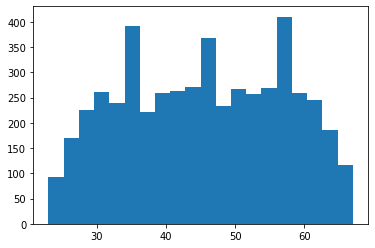

In [18]:
# EDA, Univariate Age
age_data = pdata['Age']
plt.hist(age_data, bins=20)
plt.show()

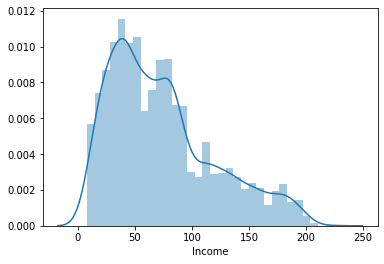

In [21]:
income_data = pdata['Income']
sns.distplot(income_data)

In [ ]:
# EDA, multivariate 
pdata_clean = pdata.dropna()
pdata_clean.head()

In [ ]:
sns.pairplot(pdata_clean)

In [ ]:
sns.scatterplot(pdata_clean['Age'], pdata_clean['Income'])

In [ ]:
sns.scatterplot(pdata_clean['Mortgage'], pdata_clean['Income'])